# Convolutional Neural Network Data Analysis

## 0 - Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
from pyts.image import GramianAngularField, MarkovTransitionField, RecurrencePlot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('data/housing price.xlsx')
df['y'] = (df['2025-04']/df['2024-11'] > 1).astype(int)

## 1 - Imaging Time Series

## 1.1 Gramian Angular Field

In [3]:
xiamen_row = df[df['city'] == '厦门']
ts_columns = [col for col in df.columns if isinstance(col, str) and '2011-01' <= col <= '2024-10']
ts = xiamen_row[ts_columns].values.flatten()
ts_index = pd.to_datetime(ts_columns)


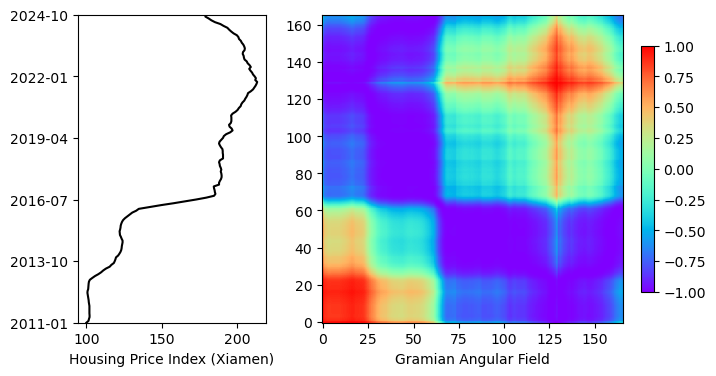

In [10]:
xiamen_row = df[df['city'] == '厦门']
ts_columns = [col for col in df.columns if isinstance(col, str) and '2011-01' <= col <= '2024-10']
ts = xiamen_row[ts_columns].values.flatten()
ts_index = pd.to_datetime(ts_columns)

# GAF 图像生成
gaf = GramianAngularField(method='summation')
gaf_image = gaf.fit_transform(ts.reshape(1, -1))[0]

# ✅ 画图：左侧为真实价格指数，右侧为 GAF 图像
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])

# 左图：真实价格指数，纵向排列
ax0 = fig.add_subplot(gs[0])
ax0.plot(ts, np.arange(len(ts)), color='black')
ax0.set_ylim(0, len(ts)-1)
# ax0.invert_yaxis()
ax0.set_xlabel('Housing Price Index (Xiamen)')

# 设置 y 轴为年份标签（可选）
tick_idx = np.linspace(0, len(ts_index)-1, 6, dtype=int)
ax0.set_yticks(tick_idx)
ax0.set_yticklabels(ts_index[tick_idx].strftime('%Y-%m'))

# 右图：GAF 图像
ax1 = fig.add_subplot(gs[1])
im = ax1.imshow(gaf_image, cmap='rainbow', origin='lower', aspect='auto')  # ← 加入 aspect='auto'
ax1.set_xlabel('Gramian Angular Field')
fig.colorbar(im, ax=ax1, shrink=0.8)

plt.show()

## 1.2 Markov Transition Field